In [1]:
# 0227

### Penguins

- Adelie, Gentoo 구분하기

In [4]:
import seaborn as sns

df = sns.load_dataset('penguins')
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [5]:
df_copy = df.copy()

In [8]:
df_copy = df_copy.dropna()

In [10]:
df_copy

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [16]:
df_copy['species'].value_counts()

species
Adelie       146
Gentoo       119
Chinstrap     68
Name: count, dtype: int64

In [39]:
species_df = df_copy.groupby(['species'])[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']].agg(['mean', 'max', 'min'])

In [40]:
species_df

bill_length_mm             bill_depth_mm              \
                    mean   max   min          mean   max   min   
species                                                          
Adelie         38.823973  46.0  32.1     18.347260  21.5  15.5   
Chinstrap      48.833824  58.0  40.9     18.420588  20.8  16.4   
Gentoo         47.568067  59.6  40.9     14.996639  17.3  13.1   

          flipper_length_mm                body_mass_g                  
                       mean    max    min         mean     max     min  
species                                                                 
Adelie           190.102740  210.0  172.0  3706.164384  4775.0  2850.0  
Chinstrap        195.823529  212.0  178.0  3733.088235  4800.0  2700.0  
Gentoo           217.235294  231.0  203.0  5092.436975  6300.0  3950.0

In [41]:
species_df = species_df.drop('Chinstrap')

In [44]:
species_df.value_counts

<bound method DataFrame.value_counts of         bill_length_mm             bill_depth_mm              \
                  mean   max   min          mean   max   min   
species                                                        
Adelie       38.823973  46.0  32.1     18.347260  21.5  15.5   
Gentoo       47.568067  59.6  40.9     14.996639  17.3  13.1   

        flipper_length_mm                body_mass_g                  
                     mean    max    min         mean     max     min  
species                                                               
Adelie         190.102740  210.0  172.0  3706.164384  4775.0  2850.0  
Gentoo         217.235294  231.0  203.0  5092.436975  6300.0  3950.0  >

### bill_length_mm / body_mass_g 기준

In [46]:
cond = df_copy['species'].isin(['Adelie', 'Gentoo'])
penguin_data = df_copy.loc[cond, ['bill_length_mm', 'body_mass_g']]
penguin_data.head()

,bill_length_mm,body_mass_g
0,39.1,3750.0
1,39.5,3800.0
2,40.3,3250.0
4,36.7,3450.0
5,39.3,3650.0


In [48]:
penguin_target = df_copy.loc[cond, ['species']]

In [50]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = \
train_test_split(penguin_data, penguin_target)

In [51]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier()

In [53]:
kn.fit(train_input, train_target['species'])

KNeighborsClassifier()

In [55]:
kn.score(test_input, test_target['species'])

0.8955223880597015

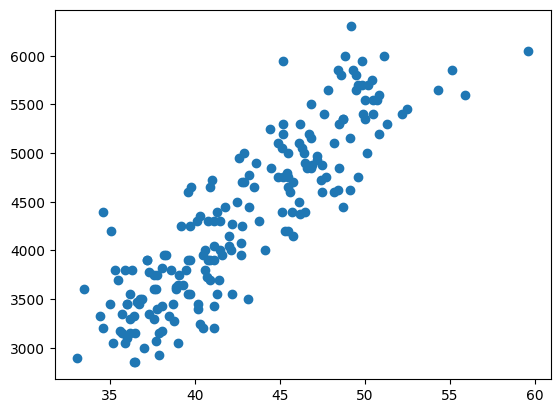

In [57]:
import matplotlib.pyplot as plt

plt.scatter(train_input['bill_length_mm'], train_input['body_mass_g'])

### flipper_length_mm / bill_length_mm 기준

In [65]:
cond2 = df_copy['species'].isin(['Adelie', 'Gentoo'])
penguin_data_2 = df_copy.loc[cond2, ['flipper_length_mm', 'bill_length_mm']]
penguin_data_2.head()

,flipper_length_mm,bill_length_mm
0,181.0,39.1
1,186.0,39.5
2,195.0,40.3
4,193.0,36.7
5,190.0,39.3


In [66]:
penguin_target_2 = df_copy.loc[cond2, ['species']]

In [67]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = \
train_test_split(penguin_data_2, penguin_target_2)

In [68]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier()

In [69]:
kn.fit(train_input, train_target['species'])

KNeighborsClassifier()

In [70]:
kn.score(test_input, test_target['species'])

0.9850746268656716

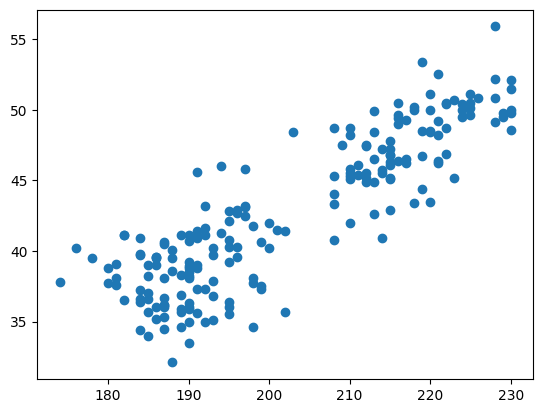

In [71]:
import matplotlib.pyplot as plt

plt.scatter(train_input['flipper_length_mm'], train_input['bill_length_mm'])